In [1]:
import numpy as np
import matplotlib.pyplot as plt

(100,)
(100,)


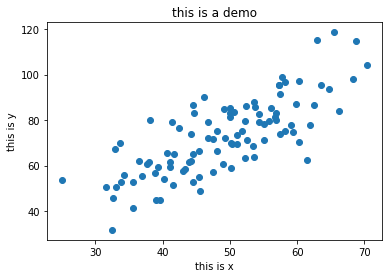

In [9]:
data = np.genfromtxt("data.csv",delimiter=",")
x_data  = data[:,0]
y_data  = data[:,1]
print(x_data.shape)
print(y_data.shape)
plt.scatter(x_data,y_data)
plt.xlabel('this is x')
plt.ylabel('this is y')
plt.title('this is a demo')
plt.show()

In [16]:
#learning rate 
lr = 0.0001

#截距
b = 0  
#斜率
k = 0  
#最大迭代次数
epochs  = 50  

#最小二乘法
def compute_error(b,k,x_data,y_data):
    totalError =  0
    for i in range(0,len(x_data)):
        totalError += (y_data[i]-(k*x_data[i]+b))**2
    return totalError/float(len(x_data))/2.0

#梯度下降
def gradient_descent_runner(x_data,y_data,b,k,lr,epochs):
    m = float(len(x_data))
    for i in range(epochs):
        b_grad = 0
        k_grad = 0
        for j in range(0,len(x_data)):
            b_grad += (1/m)*(((k*x_data[i])+b)-y_data[j])
            k_grad += (1/m) * x_data[j] * (((k * x_data[j]) + b) - y_data[j])
        b = b-(lr*b_grad)
        k = k-(lr*k_grad)
    return b,k


Starting b = 0, k = 0, error = 2782.5539172416056
Running...
After 50 iterations b = 0.02560312602263568, k = 1.4789923039305377, error = 56.32637504303017


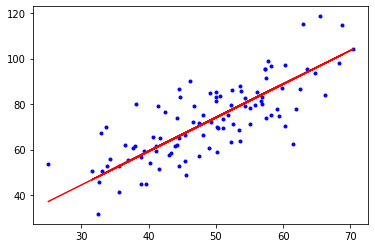

In [17]:
print("Starting b = {0}, k = {1}, error = {2}".format(b, k, compute_error(b, k, x_data, y_data)))
print("Running...")
b, k = gradient_descent_runner(x_data, y_data, b, k, lr, epochs)
print("After {0} iterations b = {1}, k = {2}, error = {3}".format(epochs, b, k, compute_error(b, k, x_data, y_data)))

#画图
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, k*x_data + b, 'r')
plt.show()

In [18]:
#用sklearn实现使一元线性回归
from sklearn.linear_model import LinearRegression


In [19]:
x_data2 = data[:,0,np.newaxis]
y_data2 = data[:,1,np.newaxis]
# 创建并拟合模型
model = LinearRegression()
model.fit(x_data2, y_data2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

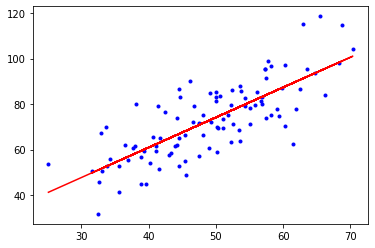

In [23]:
# 画图
plt.plot(x_data2, y_data2, 'b.')
plt.plot(x_data2, model.predict(x_data2), 'r')
plt.show()